In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time
import numpy as np
from sklearn.svm import SVC

In [2]:
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [5]:
x_images_training=images_train[:, :, :, 1]
x_train=x_images_training.reshape((50000, 32*32))
y_train=cls_train
print(x_train.shape)
print(y_train.shape)
print(x_images_training.shape)

(50000, 1024)
(50000,)
(50000, 32, 32)


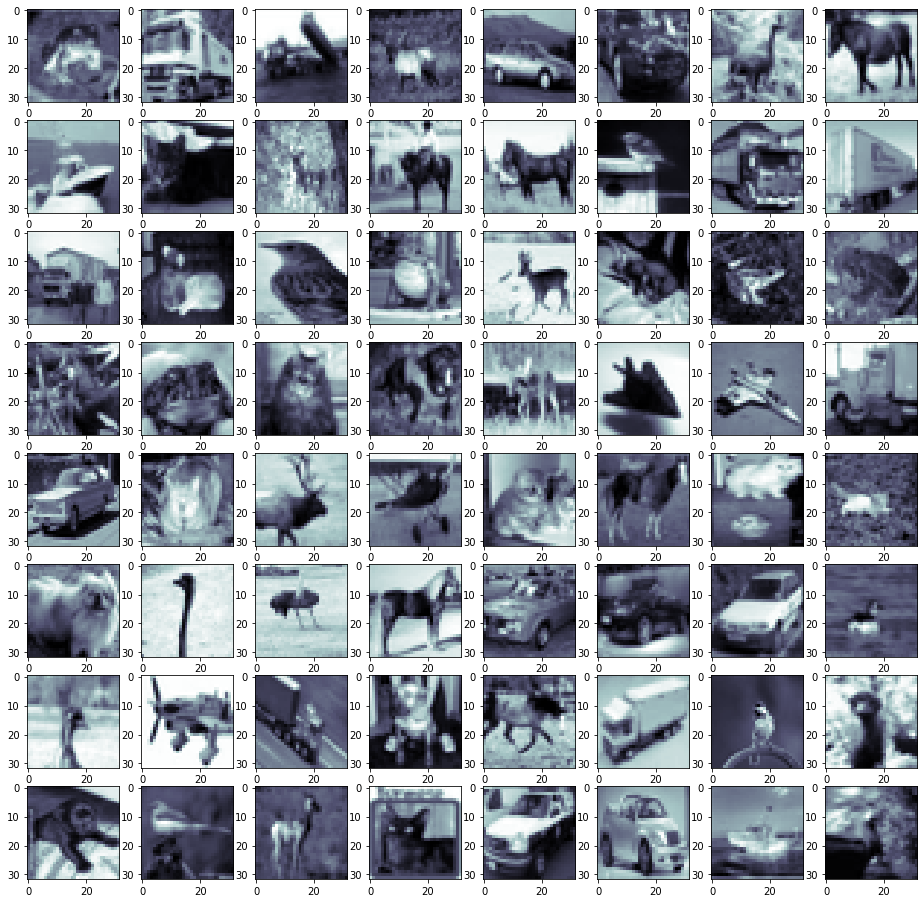

In [6]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(x_images_training[i], cmap=plt.cm.bone)
plt.show()

In [7]:
pca=PCA(whiten=True)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [8]:
k=0
current=0
total=sum(pca.explained_variance_)
while current/total<0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

434

In [9]:
pca_cifar=PCA(n_components=k, whiten=True)
x_train_transformed=pca_cifar.fit_transform(x_train)

In [10]:
x_images_test=images_test[:, :, :, 1]
x_test=x_images_test.reshape((10000, 32*32))
y_test=cls_test
print(x_test.shape)
print(y_test.shape)
print(x_images_test.shape)
x_test_transformed=pca_cifar.transform(x_test)

(10000, 1024)
(10000,)
(10000, 32, 32)


In [ ]:
clf=SVC(kernel='linear')
clf.fit(x_train_transformed, y_train)

In [ ]:
y_test_predicted=clf.predict(x_test_transformed)

In [ ]:
clf.score(x_test_transformed, y_test)

In [ ]:
dic=dict()
ans=[]
for i in range(len(class_names)):
    dic[i]=class_names[i]
for i in y_test_predicted:
    ans.append(dic[i])
np.savetxt(fname="predictions.csv", X=ans, delimiter=',', fmt="%s")